In [3]:
import pyccl as ccl
import numpy as np
import matplotlib.pyplot as plt
import sacc

In [4]:
s = sacc.Sacc()

In [ ]:
# get n(z) from DC2
# z1, nz1 --> lens
# z2, nz2 --> source

(0.001, 1.1)

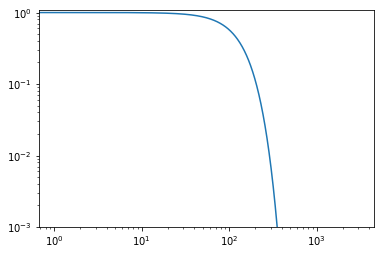

In [6]:
# Beam
fwhm = 60.  # 3 arcmin
sigma = (fwhm / 2.355) * np.pi / 180 / 60
ell_beam = np.arange(3000)
beam = np.exp(-ell_beam * (ell_beam + 1) * sigma**2)
plt.figure()
plt.loglog(ell_beam, beam)
plt.ylim([1E-3,1.1])

In [5]:
s.add_tracer('NZ', 'gc',  # Name
             quantity='galaxy_density',  # Quantity
             spin=0,  # Spin
             z=z1,  # z
             nz=nz1)  # nz
# WL
s.add_tracer('NZ', 'wl',  # Name
             quantity='galaxy_shear',  # Quantity
             spin=2,  # Spin
             z=z2,  # z
             nz=nz2,  # nz
             extra_columns={'error': 0.1*nz},  # You can include extra columns for the N(z)
             sigma_g=0.28)  # You can add any extra information as **kwargs
# CMBK
s.add_tracer('Map', 'ck',  # Name
             quantity='cmb_convergence',  # Quantity
             spin=0,  # Spin
             ell=ell_beam, beam=beam)  # Beam

NameError: name 'z' is not defined

In [ ]:
theta1 = np.arange(20) # log binning from 2.5-250 arcmin
x1 = NK data vector

theta2 = np.arange(20) # log binning from 2.5-250 arcmin
x2 = NK data vector

# NK
s. add_theta_xi('xi_00', 'gc', 'ck', theta1, x1, window=None, tracers_later=False)
# GK
s. add_theta_xi('xi_0e', 'wl', 'ck', theta2, x2, window=None, tracers_later=False)

# how to add multiple source/lens bins?


In [ ]:
covar = JK covariance
s.add_covariance(covar)

In [ ]:
s.save_fits("cmblss.fits", overwrite=True)

In [ ]:
# possible code to use for covariance -- Fourier 

fsky = 0.1
n_cross = (n_maps * (n_maps + 1)) // 2
covar = np.zeros([n_cross, n_ell, n_cross, n_ell])

id_i = 0
for i1 in range(n_maps):
    for i2 in range(i1, n_maps):
        id_j = 0
        for j1 in range(n_maps):
            for j2 in range(j1, n_maps):
                cl_i1j1 = cls[i1, j1, :]
                cl_i1j2 = cls[i1, j2, :]
                cl_i2j1 = cls[i2, j1, :]
                cl_i2j2 = cls[i2, j2, :]
                # Knox formula
                cov = (cl_i1j1 * cl_i2j2 + cl_i1j2 * cl_i2j1) / (d_ell * fsky * (2 * ells + 1))
                covar[id_i, :, id_j, :] = np.diag(cov)
                id_j += 1
        id_i += 1
covar = covar.reshape([n_cross * n_ell, n_cross * n_ell])

# useful type table: https://github.com/LSSTDESC/sacc/blob/master/sacc/data_types.py